In [1]:
#Import libraries
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy import stats
import scipy as sp
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [2]:
df = pd.read_csv('list_working.csv',index_col=0)

In [3]:
df.head()

,host_response_rate,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,room_Private room,nbrhd_Bernal Heights,nbrhd_Castro/Upper Market,nbrhd_Chinatown,nbrhd_Crocker Amazon,nbrhd_Diamond Heights,nbrhd_Downtown/Civic Center,nbrhd_Excelsior,nbrhd_Financial District,nbrhd_Glen Park,nbrhd_Golden Gate Park,nbrhd_Haight Ashbury,nbrhd_Inner Richmond,nbrhd_Inner Sunset,nbrhd_Lakeshore,nbrhd_Marina,nbrhd_Mission,nbrhd_Nob Hill,nbrhd_Noe Valley,nbrhd_North Beach,nbrhd_Ocean View,nbrhd_Outer Mission,nbrhd_Outer Richmond,nbrhd_Outer Sunset,nbrhd_Pacific Heights,nbrhd_Parkside,nbrhd_Potrero Hill,nbrhd_Presidio,nbrhd_Presidio Heights,nbrhd_Russian Hill,nbrhd_Seacliff,nbrhd_South of Market,nbrhd_Twin Peaks,nbrhd_Visitacion Valley,nbrhd_West of Twin Peaks,nbrhd_Western Addition,prop_Condominium,prop_Guest suite,prop_House
0,100,1,1.0,37.76931,-122.43386,3,1.0,1.0,2.0,170.0,2,25.0,1,217,97.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,100,1,2.0,37.75402,-122.45805,2,1.0,1.0,1.0,99.0,2,20.0,1,160,94.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,80,0,2.0,37.74511,-122.42102,5,1.0,2.0,3.0,235.0,2,0.0,30,111,98.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,86,1,10.0,37.76669,-122.45250,2,4.0,1.0,1.0,65.0,1,12.0,32,18,86.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,86,1,10.0,37.76487,-122.45183,2,4.0,1.0,1.0,65.0,1,12.0,32,8,93.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'guests_included', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'room_Private room', 'nbrhd_Bernal Heights',
       'nbrhd_Castro/Upper Market', 'nbrhd_Chinatown', 'nbrhd_Crocker Amazon',
       'nbrhd_Diamond Heights', 'nbrhd_Downtown/Civic Center',
       'nbrhd_Excelsior', 'nbrhd_Financial District', 'nbrhd_Glen Park',
       'nbrhd_Golden Gate Park', 'nbrhd_Haight Ashbury',
       'nbrhd_Inner Richmond', 'nbrhd_Inner Sunset', 'nbrhd_Lakeshore',
       'nbrhd_Marina', 'nbrhd_Mission', 'nbrhd_Nob Hill', 'nbrhd_Noe Valley',
       'nbrhd_North Beach', 'nbrhd_Ocean View', 'nbrhd_Outer Mission',
       'nbrhd_Outer Richmond', 'nbrhd_Outer Sunset', 'nbrhd_Pacific Heights',
       'nbrhd_Parkside', 'nbrhd_Potrero Hill', 'nbrhd_Presidio',
       'nbr

## Splitting into feature and target

In [5]:
df_tgt = df.price
df_feat = df.drop(['price'], axis=1)
df_feat.head()

,host_response_rate,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,room_Private room,nbrhd_Bernal Heights,nbrhd_Castro/Upper Market,nbrhd_Chinatown,nbrhd_Crocker Amazon,nbrhd_Diamond Heights,nbrhd_Downtown/Civic Center,nbrhd_Excelsior,nbrhd_Financial District,nbrhd_Glen Park,nbrhd_Golden Gate Park,nbrhd_Haight Ashbury,nbrhd_Inner Richmond,nbrhd_Inner Sunset,nbrhd_Lakeshore,nbrhd_Marina,nbrhd_Mission,nbrhd_Nob Hill,nbrhd_Noe Valley,nbrhd_North Beach,nbrhd_Ocean View,nbrhd_Outer Mission,nbrhd_Outer Richmond,nbrhd_Outer Sunset,nbrhd_Pacific Heights,nbrhd_Parkside,nbrhd_Potrero Hill,nbrhd_Presidio,nbrhd_Presidio Heights,nbrhd_Russian Hill,nbrhd_Seacliff,nbrhd_South of Market,nbrhd_Twin Peaks,nbrhd_Visitacion Valley,nbrhd_West of Twin Peaks,nbrhd_Western Addition,prop_Condominium,prop_Guest suite,prop_House
0,100,1,1.0,37.76931,-122.43386,3,1.0,1.0,2.0,2,25.0,1,217,97.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,100,1,2.0,37.75402,-122.45805,2,1.0,1.0,1.0,2,20.0,1,160,94.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,80,0,2.0,37.74511,-122.42102,5,1.0,2.0,3.0,2,0.0,30,111,98.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,86,1,10.0,37.76669,-122.45250,2,4.0,1.0,1.0,1,12.0,32,18,86.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,86,1,10.0,37.76487,-122.45183,2,4.0,1.0,1.0,1,12.0,32,8,93.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df_tgt

0       170.0
1        99.0
2       235.0
3        65.0
4        65.0
        ...  
7108    299.0
7109    100.0
7110    250.0
7111    200.0
7113    187.0
Name: price, Length: 5859, dtype: float64

## Creating the Test and Train Set

In [7]:

X_train, X_test, y_train, y_test = train_test_split(df_feat, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

reg = LinearRegression()
reg.fit(X_train,y_train)
df_feat_col = pd.DataFrame(data = df_feat.columns.values, columns=['Features'])


Training set - Features:  (4687, 54) Target:  (4687,)
Training set - Features:  (1172, 54) Target:  (1172,)


In [8]:

p_values = f_regression(X_train,y_train)[1]
df_feat_col['Weights'] = reg.coef_
df_feat_col['P Values'] = p_values.round(3)
df_feat_col.sort_values(['P Values'], ascending=False)

,Features,Weights,P Values
20,nbrhd_Diamond Heights,1.702497e+01,0.904
1,host_is_superhost,-5.978839e+00,0.841
2,host_total_listings_count,-1.596777e-03,0.697
31,nbrhd_Mission,2.852269e+01,0.656
28,nbrhd_Inner Sunset,2.179622e+01,0.623
37,nbrhd_Outer Richmond,-1.263418e+01,0.358
45,nbrhd_Seacliff,-2.573889e+01,0.344
23,nbrhd_Financial District,4.813163e+01,0.262
43,nbrhd_Presidio Heights,4.118982e+01,0.253
47,nbrhd_Twin Peaks,4.110402e+01,0.174


In [9]:
r2_train = reg.score(X_train, y_train)
r2_train = round(r2_train, 3)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train


0.587

In [10]:


y_train_pred = reg.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

92.064

In [11]:
reg.score(X_test, y_test)
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
adjusted_r2_test


0.531

In [12]:
y_test_pred = reg.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse

92.3525663600125

Text(0, 0.5, 'Predictions')

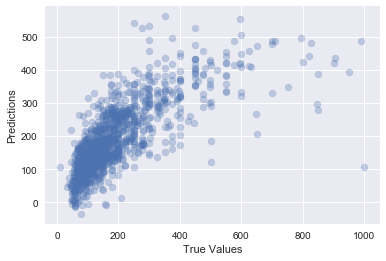

In [13]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [14]:

summary_df = pd.DataFrame(columns=['Model', 'Description','Train (RMSE)', 'R-squared (training)', 'Adjusted R-squared (training)','Test (RMSE)','R-squared (test)', 'Adjusted R-squared (test)'])
summary_df

,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)


In [15]:

summary_df = summary_df.append({'Model' : 'Multiple Regression-1', 'Description' : 'All Features' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df




,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,92.064,0.592,0.587,92.352566,0.552,0.531


## Second Model- Dropping Superhost and Host Listings Count
Superhost and Host Listings Count had the highest P-Values which means we're the least confident they are not 0. Dropping it and running the model again

In [16]:
df_feat = df.drop(['host_is_superhost','host_total_listings_count','price',], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

reg = LinearRegression()
reg.fit(X_train,y_train)
df_feat_col = pd.DataFrame(data = df_feat.columns.values, columns=['Features'])


Training set - Features:  (4687, 52) Target:  (4687,)
Training set - Features:  (1172, 52) Target:  (1172,)


In [18]:
p_values = f_regression(X_train,y_train)[1]
df_feat_col['Weights'] = reg.coef_
df_feat_col['P Values'] = p_values.round(3)
df_feat_col.sort_values(['P Values'], ascending=False)

,Features,Weights,P Values
18,nbrhd_Diamond Heights,1.751841e+01,0.904
29,nbrhd_Mission,2.809473e+01,0.656
26,nbrhd_Inner Sunset,2.208968e+01,0.623
35,nbrhd_Outer Richmond,-1.161682e+01,0.358
43,nbrhd_Seacliff,-2.680852e+01,0.344
21,nbrhd_Financial District,4.762311e+01,0.262
41,nbrhd_Presidio Heights,4.209052e+01,0.253
45,nbrhd_Twin Peaks,4.099312e+01,0.174
27,nbrhd_Lakeshore,5.687479e+01,0.171
14,nbrhd_Bernal Heights,1.532704e+01,0.163


In [19]:
r2_train = reg.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.587

In [20]:
y_train_pred = reg.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

92.107

In [21]:
reg.score(X_test, y_test)
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
adjusted_r2_test

0.531

In [22]:
y_test_pred = reg.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

92.353

Text(0, 0.5, 'Predictions')

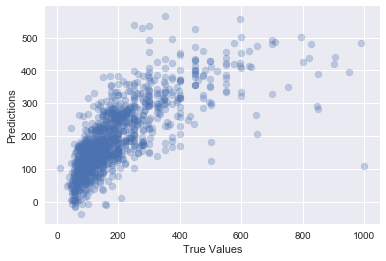

In [23]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [24]:

summary_df = summary_df.append({'Model' : 'Multiple Regression-2', 'Description' : 'Drop Super/Host Listings' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df


,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,92.064,0.592,0.587,92.352566,0.552,0.531
1,Multiple Regression-2,Drop Super/Host Listings,92.107,0.592,0.587,92.353000,0.552,0.531


## Next we're going to perform lasso, ridge and elastic net on our model
    
    

In [78]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, y_train)
list(lasso_regressor.best_params_.values())[0]

0.01

In [79]:
lr_lasso = Lasso(alpha= list(lasso_regressor.best_params_.values())[0], normalize= True, max_iter= 1000)

In [80]:
lr_lasso.fit(X_train, y_train)
predict = lr_lasso.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, lr_lasso.predict(X_train)))
print(train_rmse)

92.2827129456168


In [28]:
r2_train = lr_lasso.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
print(adjusted_r2_train)

0.586


In [29]:
r2_test = lr_lasso.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(adjusted_r2_test)

0.53


In [30]:
y_test_pred = lr_lasso.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

92.514

Text(0, 0.5, 'Predictions')

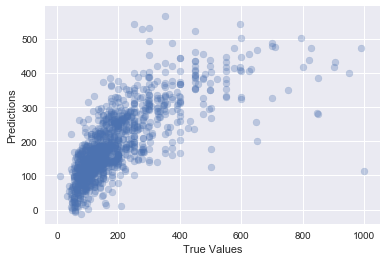

In [31]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [32]:

summary_df = summary_df.append({'Model' : 'Multiple Regression-3', 'Description' : 'Lasso' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df


,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,92.064000,0.592,0.587,92.352566,0.552,0.531
1,Multiple Regression-2,Drop Super/Host Listings,92.107000,0.592,0.587,92.353000,0.552,0.531
2,Multiple Regression-3,Lasso,92.282713,0.590,0.586,92.514000,0.551,0.530


In [33]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train, y_train)
print(ridge_regressor.best_params_)

{'alpha': 0.01}


In [66]:
lr_ridge = Ridge(alpha = ridge_regressor.best_params_, normalize = True, max_iter= 1000)

In [67]:
lr_ridge.fit(X_train, y_train)
predict = lr_ridge.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, lr_ridge.predict(X_train)))
print(train_rmse)

TypeError: float() argument must be a string or a number, not 'dict'

In [36]:
r2_train = lr_ridge.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
print(adjusted_r2_train)

0.587


In [37]:
r2_test = lr_ridge.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(adjusted_r2_test)

0.532


In [38]:
y_test_pred = lr_ridge.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

92.339

Text(0, 0.5, 'Predictions')

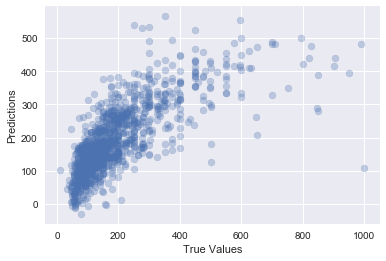

In [39]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [40]:

summary_df = summary_df.append({'Model' : 'Multiple Regression-4', 'Description' : 'Ridge' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df


,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,92.064000,0.592,0.587,92.352566,0.552,0.531
1,Multiple Regression-2,Drop Super/Host Listings,92.107000,0.592,0.587,92.353000,0.552,0.531
2,Multiple Regression-3,Lasso,92.282713,0.590,0.586,92.514000,0.551,0.530
3,Multiple Regression-4,Ridge,92.120962,0.592,0.587,92.339000,0.552,0.532


In [41]:
elastic = ElasticNetCV(eps = None, n_alphas = None, alphas=[0.1, 1.0, 10.0], l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0],cv=5)

elastic.fit(X_train, y_train)
predict = elastic.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, elastic.predict(X_train)))
print(train_rmse)

92.57870650210572


In [42]:
r2_train = elastic.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
print(adjusted_r2_train)

0.583


In [43]:
r2_test = elastic.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(adjusted_r2_test)

0.526


In [44]:
y_test_pred = elastic.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

92.896

Text(0, 0.5, 'Predictions')

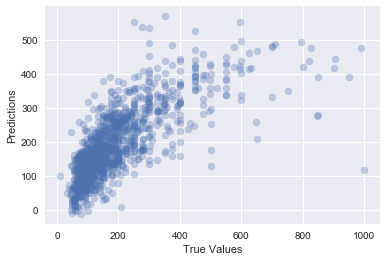

In [45]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [46]:

summary_df = summary_df.append({'Model' : 'Multiple Regression-5', 'Description' : 'Elastic Net' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df


,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,92.064000,0.592,0.587,92.352566,0.552,0.531
1,Multiple Regression-2,Drop Super/Host Listings,92.107000,0.592,0.587,92.353000,0.552,0.531
2,Multiple Regression-3,Lasso,92.282713,0.590,0.586,92.514000,0.551,0.530
3,Multiple Regression-4,Ridge,92.120962,0.592,0.587,92.339000,0.552,0.532
4,Multiple Regression-5,Elastic Net,92.578707,0.588,0.583,92.896000,0.547,0.526


## Creating a 2nd Order Polynomial Model


In [62]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

(1172, 1431)

In [59]:
reg = LinearRegression()
reg.fit(X_train_poly,y_train)
r2_train = reg.score(X_train_poly, y_train)
n = X_train_poly.shape[0]
p = X_train_poly.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.633

In [60]:
y_train_pred = reg.predict(X_train_poly)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

72.763

In [61]:
#reg.fit(X_test_poly, y_test)
r2_test = reg.score(X_test_poly, y_test)
n = X_test.shape[0]
p = X_test_poly.shape[1]

adjusted_r2_test = (1-(1-r2_test))*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(r2_test)
print(adjusted_r2_test)
print(n)
print(p)

0.473
-2.132
1172
1431


In [51]:
y_test_pred = reg.predict(X_test_poly)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

100.146

Text(0, 0.5, 'Predictions')

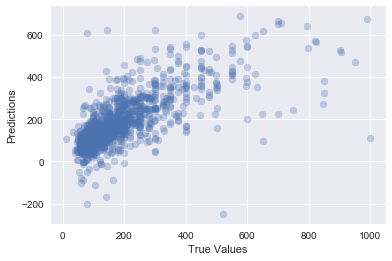

In [52]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [95]:
def make_models(data, target, num_iter=5, models=['ols', 'lasso', 'ridge'], complexity='simple', degree=3):
    '''This function takes in the features, target, model, and complexity to return
    r^2 values for a test and a training set'''
    x_axis = np.arange(num_iter)
    ols_test = []
    lasso_test = []
    ridge_test = []
    sample_models = {}
    parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
    model_metrics = {}
    for i in range(num_iter):
        if complexity == 'simple':
            X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2)
        elif complexity == 'polynomial':
            poly = PolynomialFeatures(degree=degree)
            Xp = poly.fit_transform(data)
            X_train, X_test, Y_train, Y_test = train_test_split(Xp, target, test_size=0.2)
        elif complexity == 'poly_intx':
            poly_intx = PolynomialFeatures(degree=degree, interaction_only=True)
            Xpn = poly_intx.fit_transform(data)
            X_train, X_test, Y_train, Y_test = train_test_split(Xpn, target, test_size=0.2)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train=scaler.transform(X_train)
        X_test=scaler.transform(X_test)
        if 'ols' in models:
            linreg = LinearRegression()
            ols_model_tr = linreg.fit(X_train, Y_train)
            train_pred = ols_model_tr.predict(X_train)
            test_pred = ols_model_tr.predict(X_test)
            sample_models['ols'] = ols_model_tr
            test_score = ols_model_tr.score(X_test, Y_test)
            ols_test.append(test_score)
            model_metrics['ols_train_rmse'] = np.sqrt(mean_squared_error(Y_train, train_pred))
            model_metrics['ols_test_rmse'] = np.sqrt(mean_squared_error(Y_test, test_pred))
            model_metrics['ols_test_r2'] = ols_model_tr.score(X_test, Y_test)
            model_metrics['ols_train_r2'] = ols_model_tr.score(X_train, Y_train)
        if 'lasso' in models:
            lasso_regressor = GridSearchCV(Lasso(), parameters, scoring='neg_mean_squared_error', cv = 5)
            lasso_regressor.fit(X_train, y_train)
            alpha = list(lasso_regressor.best_params_.values())[0]
            lasso = Lasso(alpha=alpha, max_iter=100)
            lasso_model_tr = lasso.fit(X_train, Y_train)
            train_pred = lasso_model_tr.predict(X_train)
            test_pred = lasso_model_tr.predict(X_test)
            sample_models['lasso'] = lasso_model_tr
            test_score = lasso_model_tr.score(X_test, Y_test)
            lasso_test.append(test_score)
            model_metrics['lasso_train_rmse'] = np.sqrt(mean_squared_error(Y_train, train_pred))
            model_metrics['lasso_test_rmse'] = np.sqrt(mean_squared_error(Y_test, test_pred))
            model_metrics['lasso_test_r2'] = lasso_model_tr.score(X_test, Y_test)
            model_metrics['lasso_train_r2'] = lasso_model_tr.score(X_train, Y_train)
        if 'ridge' in models:
            ridge_regressor = GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error', cv = 5)
            ridge_regressor.fit(X_train, y_train)
            alpha = list(ridge_regressor.best_params_.values())[0]
            ridge = Ridge(alpha=alpha, max_iter=100)
            ridge_model_tr = ridge.fit(X_train, Y_train)
            train_pred = ridge_model_tr.predict(X_train)
            test_pred = ridge_model_tr.predict(X_test)
            sample_models['ridge'] = ridge_model_tr
            test_score = ridge_model_tr.score(X_test, Y_test)
            ridge_test.append(test_score)
            model_metrics['ridge_train_rmse'] = np.sqrt(mean_squared_error(Y_train, train_pred))
            model_metrics['ridge_test_rmse'] = np.sqrt(mean_squared_error(Y_test, test_pred))
            model_metrics['ridge_test_r2'] = ridge_model_tr.score(X_test, Y_test)
            model_metrics['ridge_train_r2'] = ridge_model_tr.score(X_train, Y_train)
        i += 1
    if 'ols' in models:
        plt.plot(ols_test, label='ols')
    if 'ridge' in models:
        plt.plot(ridge_test, label='ridge')
    if 'lasso' in models:
        plt.plot(lasso_test, label='lasso')
    plt.ylabel('R2 test score')
    plt.xlabel('number of iterations')
    plt.ylim((0.40, 0.99))
    plt.legend()
    return sample_models, model_metrics

({'ols': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)},
 {'ols_train_rmse': 90.94562234229119,
  'ols_test_rmse': 97.22314017314828,
  'ols_test_r2': 0.5280835301261206,
  'ols_train_r2': 0.5972838875088549})

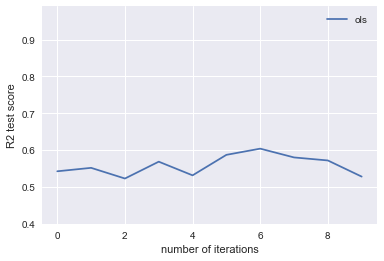

In [101]:
make_models(df_feat, df_tgt, num_iter=10, models=['ols'], complexity='simple', degree=1)


0       170.0
1        99.0
2       235.0
3        65.0
4        65.0
        ...  
7108    299.0
7109    100.0
7110    250.0
7111    200.0
7113    187.0
Name: price, Length: 5859, dtype: float64